In [48]:
import csv
import os
import pandas as pd
from datetime import timedelta
import datetime as dt

In [2]:
# Get path to the repo directory
dir_path = "/".join(os.getcwd().split("/")[0:-1])

# 1. Load Data

In [95]:
negative_reviews_smell = pd.read_csv(open(dir_path + "/data/interim/negative-reviews-smell.csv"))

In [96]:
negative_reviews_smell

,Unnamed: 0,product_title,asin,author,review,rating,date,url,sentiment
0,4096,Yankee Candle Large Jar Candle Bahama Breeze,B004G9DV66,Zombie Gil 007,"I used to love Yankee Candle, sadly not anymor...",2.0,2020-03-01,https://www.amazon.com/s?k=yankee+candles&crid...,negative
1,6257,"Yankee Candle Large Jar Candle, Silver Birch",B00J6CH1VO,AnnaMarie,Complete waste of money! No smell whatsoever!!...,1.0,2020-03-06,https://www.amazon.com/s?k=yankee+candles&crid...,negative
2,10136,Yankee Candle Large Jar Candle Sage & Citrus,B000RY54LO,cindy martin,Hate the scent,1.0,2020-03-07,https://www.amazon.com/s?k=yankee+candles&crid...,negative
3,7324,Yankee Candle Large Jar Candle Café Al Fresco,B01NAAQLZ1,Rebecca Silberstein,First the wick was not centered so the burn wa...,1.0,2020-03-07,https://www.amazon.com/s?k=yankee+candles&crid...,negative
4,9816,Yankee Candle Large Jar Candle French Vanilla,B000W3T9GG,Rebecca Silberstein,First the wick was not centered so the burn wa...,1.0,2020-03-07,https://www.amazon.com/s?k=yankee+candles&crid...,negative
...,...,...,...,...,...,...,...,...,...
827,8437,"Yankee Candle Large Jar Candle, Autumn Wreath",B000TVJ6XW,Philly T.,This candle burned out constantly. I trimmed w...,1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative
828,3357,"Yankee Candle Large 2-Wick Tumbler Candle, Spi...",B004USM1A0,Philly T.,This candle burned out constantly. I trimmed w...,1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative
829,5131,"Yankee Candle Balsam & Cedar Scented Candles, ...",B002UE6YQ8,MJ,"I was sent an old expired candle, it was so ol...",1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative
830,567,Yankee Candle Large Jar Candle Spiced Pumpkin,B000W3V8S8,Philly T.,This candle burned out constantly. I trimmed w...,1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative


# 2. Split data by week

In [97]:
# Declare loop variables
start_date = dt.datetime(2020, 3, 1)
end_date = dt.datetime(2022, 1, 16)
curr_week = 1
delta = timedelta(days=7)

# To be appended to df
weeks = []

In [98]:
# Loop until the lower-bound date is greater than the end date
while start_date <= end_date:
    # Loop through each element of the data frame
    for index, row in negative_reviews_smell.iterrows():
        # Cast row['date'] to datetime object
        t_dt = dt.datetime.strptime(row['date'], '%Y-%m-%d')
        
        # Check if the row's date is within the bounds
        if t_dt >= start_date:
            if t_dt < (start_date + delta):
                # If it is, append current week to 'weeks'
                weeks.append(curr_week)
                
    # Increment date boundaries
    start_date = start_date + delta
    #end_date = end_date + delta
    
    # Increment current week
    curr_week = curr_week + 1

In [99]:
# Append weeks column to data frame
negative_reviews_smell['week_no'] = weeks

In [107]:
# Examine the distribution of each week's reviews
negative_reviews_smell['week_no'].value_counts()

93    35
96    29
32    24
34    24
38    22
      ..
67     2
18     1
85     1
72     1
99     1
Name: week_no, Length: 95, dtype: int64

# 3. Examine December 2021 data

In [113]:
# Subset data to include only reviews left in December of 2021
december_21_data = negative_reviews_smell[negative_reviews_smell['date'].str.contains("2021-12")]

<AxesSubplot:>

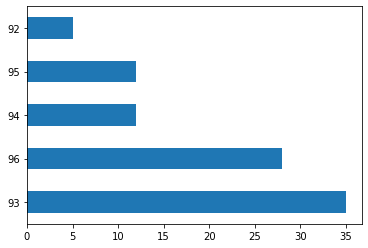

In [114]:
# Preview data by looking into each week's count
december_21_data['week_no'].value_counts().plot(kind='barh')